In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

In [52]:
df = pd.read_csv("train_feature.csv",encoding='big5')
# df = pd.read_csv("test_feature.csv",encoding='big5')
df.head(5)

C:\Users\Selena Huang\AppData\Local\Temp\ipykernel_5408\224813995.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_feature.csv",encoding='big5')


,Index,主要建材,主要用途,交易年月日,交易標的,交易筆棟數,備註,土地區段位置/建物區段門牌,土地移轉總面積(平方公尺),建物型態,...,非都市土地使用編定,num_of_bus_stations_in_100m,income_avg,income_var,location_type,low_use_electricity,nearest_tarin_station,nearest_tarin_station_distance,lat,lng
0,0,鋼筋混凝土造,住家用,0104-10-21 00:00:00,房地(土地+建物),土地2建物1車位0,NaN,臺北市大安區忠孝東路四段216巷27弄1~30號,42.47,華廈(10層含以下有電梯),...,NaN,1.0,1842.0,230.73,ROOFTOP,4.35%,忠孝敦化站,243.720563,25.040024,121.553310
1,1,鋼筋混凝土造,住家用,0104-05-23 00:00:00,房地(土地+建物),土地1建物1車位0,NaN,臺北市中正區林森南路91~120號,10.18,套房(1房1廳1衛),...,NaN,3.0,4487.0,2403.41,RANGE_INTERPOLATED,8.28%,臺大醫院站,460.755880,25.038312,121.521534
2,2,鋼筋混凝土造,住家用,0105-07-15 00:00:00,房地(土地+建物)+車位,土地1建物1車位2,含增建或未登記建物。內含獨立產權車位，未包含在棟數內。,臺北市文山區木新路三段95巷7弄1~30號,33.26,住宅大樓(11層含以上有電梯),...,NaN,3.0,1253.0,125.20,RANGE_INTERPOLATED,4.58%,萬芳醫院站,2041.004785,24.981564,121.563008
3,3,鋼筋混凝土造,住家用,0105-01-07 00:00:00,房地(土地+建物),土地1建物1車位0,含增建,臺北市內湖區內湖路一段285巷65弄31~60號,20.15,公寓(5樓含以下無電梯),...,NaN,0.0,987.0,161.51,ROOFTOP,3.21%,西湖站,283.496196,25.084378,121.568545
4,4,NaN,NaN,0105-08-24 00:00:00,土地,土地2建物0車位0,NaN,芝蘭段二小段511~540地號,273.76,其他,...,NaN,4.0,1105.0,107.00,APPROXIMATE,4.56%,台北101/世貿中心站,225.107002,25.032969,121.565418


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46482 entries, 0 to 46481
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           46482 non-null  int64  
 1   主要建材                            41793 non-null  object 
 2   主要用途                            40381 non-null  object 
 3   交易年月日                           46482 non-null  object 
 4   交易標的                            46482 non-null  object 
 5   交易筆棟數                           46482 non-null  object 
 6   備註                              20872 non-null  object 
 7   土地區段位置/建物區段門牌                   46482 non-null  object 
 8   土地移轉總面積(平方公尺)                   46482 non-null  float64
 9   建物型態                            46482 non-null  object 
 10  建物現況格局-廳                        46482 non-null  int64  
 11  建物現況格局-房                        46482 non-null  int64  
 12  建物現況格局-衛                        

In [54]:
df.describe()

,Index,土地移轉總面積(平方公尺),建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物移轉總面積(平方公尺),建築完成年月,車位移轉總面積(平方公尺),非都市土地使用編定,num_of_bus_stations_in_100m,income_avg,income_var,nearest_tarin_station_distance,lat,lng
count,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,3.683900e+04,46482.000000,0.0,46478.000000,46228.000000,46228.000000,46478.000000,46478.000000,46478.000000
mean,23240.500000,58.883628,1.332344,2.113592,1.342111,135.444294,8.514608e+05,12.079936,NaN,2.232691,1297.368089,228.824338,622.885500,25.055743,121.544005
std,13418.341943,652.986089,0.968113,1.944809,1.392133,502.983105,1.555279e+05,61.945046,NaN,1.574880,495.769252,245.944961,510.194851,0.036743,0.031919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,0.000000,NaN,0.000000,682.000000,81.630000,0.000000,24.965286,121.464657
25%,11620.250000,11.600000,1.000000,1.000000,1.000000,53.322500,7.112080e+05,0.000000,NaN,1.000000,1005.000000,114.800000,299.773547,25.032969,121.519235
50%,23240.500000,23.940000,2.000000,2.000000,1.000000,98.620000,8.509160e+05,0.000000,NaN,2.000000,1137.000000,150.760000,494.652432,25.051838,121.541482
75%,34860.750000,37.000000,2.000000,3.000000,2.000000,155.197500,1.010403e+06,0.000000,NaN,3.000000,1446.000000,245.280000,751.947269,25.077403,121.565418
max,46481.000000,102554.980000,80.000000,168.000000,174.000000,69125.530000,1.070130e+06,5073.920000,NaN,10.000000,6598.000000,2403.410000,6007.085560,25.172812,121.624223


In [55]:
df = df.drop(columns=['交易年月日','備註','土地區段位置/建物區段門牌','編號','交易筆棟數',
                      '建築完成年月','非都市土地使用分區','非都市土地使用編定'])
df

,Index,主要建材,主要用途,交易標的,土地移轉總面積(平方公尺),建物型態,建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物現況格局-隔間,...,鄉鎮市區,num_of_bus_stations_in_100m,income_avg,income_var,location_type,low_use_electricity,nearest_tarin_station,nearest_tarin_station_distance,lat,lng
0,0,鋼筋混凝土造,住家用,房地(土地+建物),42.47,華廈(10層含以下有電梯),2,4,2,有,...,大安區,1.0,1842.0,230.73,ROOFTOP,4.35%,忠孝敦化站,243.720563,25.040024,121.553310
1,1,鋼筋混凝土造,住家用,房地(土地+建物),10.18,套房(1房1廳1衛),0,1,1,有,...,中正區,3.0,4487.0,2403.41,RANGE_INTERPOLATED,8.28%,臺大醫院站,460.755880,25.038312,121.521534
2,2,鋼筋混凝土造,住家用,房地(土地+建物)+車位,33.26,住宅大樓(11層含以上有電梯),2,3,2,有,...,文山區,3.0,1253.0,125.20,RANGE_INTERPOLATED,4.58%,萬芳醫院站,2041.004785,24.981564,121.563008
3,3,鋼筋混凝土造,住家用,房地(土地+建物),20.15,公寓(5樓含以下無電梯),2,3,2,有,...,內湖區,0.0,987.0,161.51,ROOFTOP,3.21%,西湖站,283.496196,25.084378,121.568545
4,4,NaN,NaN,土地,273.76,其他,0,0,0,有,...,士林區,4.0,1105.0,107.00,APPROXIMATE,4.56%,台北101/世貿中心站,225.107002,25.032969,121.565418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,46477,鋼筋混凝土造,住家用,房地(土地+建物)+車位,20.31,住宅大樓(11層含以上有電梯),2,4,2,有,...,大同區,3.0,1019.0,202.65,ROOFTOP,7.27%,大橋頭站,341.679757,25.066120,121.513942
46478,46478,鋼筋混凝土造,住家用,房地(土地+建物),23.88,公寓(5樓含以下無電梯),2,2,1,有,...,信義區,3.0,1276.0,126.51,ROOFTOP,3.20%,永春站,71.990784,25.040145,121.576939
46479,46479,鋼筋混凝土造,住家用,房地(土地+建物),8.03,套房(1房1廳1衛),1,1,1,有,...,士林區,2.0,851.0,97.00,RANGE_INTERPOLATED,3.37%,劍潭站,580.837941,25.082793,121.519788
46480,46480,鋼筋混凝土造,住家用,房地(土地+建物)+車位,27.74,住宅大樓(11層含以上有電梯),2,2,2,有,...,內湖區,0.0,1458.0,160.46,RANGE_INTERPOLATED,6.58%,文德站,665.482925,25.083569,121.589117


In [56]:
df.rename(columns={'主要用途': 'main_purpose',
                   '主要建材': 'main_materials',
                   '交易標的': 'transaction_target',
                   '土地移轉總面積(平方公尺)': 'land_transfer_area',
                   '建物型態': 'building_type',
                   '建物現況格局-廳': 'hall',
                   '建物現況格局-房': 'room',
                   '建物現況格局-衛': 'bathroom',
                   '建物現況格局-隔間': 'compartment',
                   '建物移轉總面積(平方公尺)': 'building_transfer_area',
                   '有無管理組織': 'management_organization',
                   '移轉層次': 'transfer_level',
                   '總樓層數': 'total_floors',
                   '車位移轉總面積(平方公尺)': 'parking_transfer_area',
                   '車位類別': 'parking_space_type',
                   '都市土地使用分區': 'urban_land_usage_zone',
                   '鄉鎮市區': 'township'}, inplace=True)

In [57]:
# Best Result
df = df.drop(columns=['main_materials','nearest_tarin_station'])
df

,Index,main_purpose,transaction_target,land_transfer_area,building_type,hall,room,bathroom,compartment,building_transfer_area,...,urban_land_usage_zone,township,num_of_bus_stations_in_100m,income_avg,income_var,location_type,low_use_electricity,nearest_tarin_station_distance,lat,lng
0,0,住家用,房地(土地+建物),42.47,華廈(10層含以下有電梯),2,4,2,有,160.83,...,住,大安區,1.0,1842.0,230.73,ROOFTOP,4.35%,243.720563,25.040024,121.553310
1,1,住家用,房地(土地+建物),10.18,套房(1房1廳1衛),0,1,1,有,31.30,...,住,中正區,3.0,4487.0,2403.41,RANGE_INTERPOLATED,8.28%,460.755880,25.038312,121.521534
2,2,住家用,房地(土地+建物)+車位,33.26,住宅大樓(11層含以上有電梯),2,3,2,有,215.38,...,住,文山區,3.0,1253.0,125.20,RANGE_INTERPOLATED,4.58%,2041.004785,24.981564,121.563008
3,3,住家用,房地(土地+建物),20.15,公寓(5樓含以下無電梯),2,3,2,有,85.88,...,住,內湖區,0.0,987.0,161.51,ROOFTOP,3.21%,283.496196,25.084378,121.568545
4,4,NaN,土地,273.76,其他,0,0,0,有,0.00,...,其他,士林區,4.0,1105.0,107.00,APPROXIMATE,4.56%,225.107002,25.032969,121.565418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,46477,住家用,房地(土地+建物)+車位,20.31,住宅大樓(11層含以上有電梯),2,4,2,有,232.65,...,商,大同區,3.0,1019.0,202.65,ROOFTOP,7.27%,341.679757,25.066120,121.513942
46478,46478,住家用,房地(土地+建物),23.88,公寓(5樓含以下無電梯),2,2,1,有,66.09,...,住,信義區,3.0,1276.0,126.51,ROOFTOP,3.20%,71.990784,25.040145,121.576939
46479,46479,住家用,房地(土地+建物),8.03,套房(1房1廳1衛),1,1,1,有,52.59,...,住,士林區,2.0,851.0,97.00,RANGE_INTERPOLATED,3.37%,580.837941,25.082793,121.519788
46480,46480,住家用,房地(土地+建物)+車位,27.74,住宅大樓(11層含以上有電梯),2,2,2,有,158.85,...,住,內湖區,0.0,1458.0,160.46,RANGE_INTERPOLATED,6.58%,665.482925,25.083569,121.589117


In [58]:
#Label Encoding
df.loc[df['compartment'] == '有','compartment'] = 1
df.loc[df['compartment'] == '無','compartment'] = 0
df.loc[df['management_organization'] == '有','management_organization'] = 1
df.loc[df['management_organization'] == '無','management_organization'] = 0

#新增特徵
df.loc[df['building_type'].str.contains('有電梯') == True,'elevator'] = 1
df.loc[df['building_type'].str.contains('有電梯') == False,'elevator'] = 0

#新增特徵
df.loc[df['transfer_level'].notna() == False,'transfer_level'] = '無'
df.loc[df['transfer_level'].str.contains('陽台') == True,'balcony'] = 1
df.loc[df['transfer_level'].str.contains('陽台') == False,'balcony'] = 0
df.loc[df['transfer_level'].str.contains('露台') == True,'terrace'] = 1
df.loc[df['transfer_level'].str.contains('露台') == False,'terrace'] = 0
df.loc[df['transfer_level'].str.contains('平台') == True,'platform'] = 1
df.loc[df['transfer_level'].str.contains('平台') == False,'platform'] = 0
df.loc[df['transfer_level'].str.contains('地下') == True,'basement'] = 1
df.loc[df['transfer_level'].str.contains('地下') == False,'basement'] = 0
df.loc[df['transfer_level'].str.contains('騎樓') == True,'arcade'] = 1
df.loc[df['transfer_level'].str.contains('騎樓') == False,'arcade'] = 0
df.loc[df['transfer_level'].str.contains('停車場') == True,'parking_lot'] = 1
df.loc[df['transfer_level'].str.contains('停車場') == False,'parking_lot'] = 0
df.loc[df['transfer_level'].str.contains('走廊') == True,'corridor'] = 1
df.loc[df['transfer_level'].str.contains('走廊') == False,'corridor'] = 0
df.loc[df['transfer_level'].str.contains('通道') == True,'aisle'] = 1
df.loc[df['transfer_level'].str.contains('通道') == False,'aisle'] = 0
df.loc[df['transfer_level'].str.contains('電梯樓梯間') == True,'elevator_stairwell'] = 1
df.loc[df['transfer_level'].str.contains('電梯樓梯間') == False,'elevator_stairwell'] = 0
df.loc[df['transfer_level'].str.contains('防空避難室') == True,'shelter'] = 1
df.loc[df['transfer_level'].str.contains('防空避難室') == False,'shelter'] = 0
df.loc[df['transfer_level'].str.contains('屋頂突出物') == True,'roof_overhang'] = 1
df.loc[df['transfer_level'].str.contains('屋頂突出物') == False,'roof_overhang'] = 0
df = df.drop(columns=['transfer_level'])

# #移除特殊值
# df.loc[df['nearest_tarin_station'] == '先嗇宮','nearest_tarin_station'] = '三重站'

# #補空值並移除特殊值
# df.loc[df['main_materials'].notna() == False,'main_materials'] = '無'
# df.loc[df['main_materials'] == '竹造','main_materials'] = '木造'

# #補空值
# df.loc[df['main_purpose'].notna() == False,'main_purpose'] = '無'

# #補空值
# df.loc[df['parking_space_type'].notna() == False,'parking_space_type'] = '無'

#去除% 轉型態 補空值
df['low_use_electricity'] = df['low_use_electricity'].str.replace('%','').astype(float)
df['low_use_electricity'].fillna(value = df['low_use_electricity'].mean(), inplace=True)

#補空值
df['income_avg'].fillna(value = df['income_avg'].mean(), inplace=True)
df['income_var'].fillna(value = df['income_var'].mean(), inplace=True)

df['num_of_bus_stations_in_100m'].fillna(value = df['num_of_bus_stations_in_100m'].mean(), inplace=True)
df['nearest_tarin_station_distance'].fillna(value = df['nearest_tarin_station_distance'].mean(), inplace=True)

df['lat'].fillna(value = df['lat'].mean(), inplace=True)
df['lng'].fillna(value = df['lng'].mean(), inplace=True)

df

,Index,main_purpose,transaction_target,land_transfer_area,building_type,hall,room,bathroom,compartment,building_transfer_area,...,terrace,platform,basement,arcade,parking_lot,corridor,aisle,elevator_stairwell,shelter,roof_overhang
0,0,住家用,房地(土地+建物),42.47,華廈(10層含以下有電梯),2,4,2,1,160.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,住家用,房地(土地+建物),10.18,套房(1房1廳1衛),0,1,1,1,31.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,住家用,房地(土地+建物)+車位,33.26,住宅大樓(11層含以上有電梯),2,3,2,1,215.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,住家用,房地(土地+建物),20.15,公寓(5樓含以下無電梯),2,3,2,1,85.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,NaN,土地,273.76,其他,0,0,0,1,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,46477,住家用,房地(土地+建物)+車位,20.31,住宅大樓(11層含以上有電梯),2,4,2,1,232.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46478,46478,住家用,房地(土地+建物),23.88,公寓(5樓含以下無電梯),2,2,1,1,66.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46479,46479,住家用,房地(土地+建物),8.03,套房(1房1廳1衛),1,1,1,1,52.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46480,46480,住家用,房地(土地+建物)+車位,27.74,住宅大樓(11層含以上有電梯),2,2,2,1,158.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#查看相關係數
cor = df.corr()
cor

,Index,land_transfer_area,hall,room,bathroom,building_transfer_area,parking_transfer_area,num_of_bus_stations_in_100m,income_avg,income_var,...,terrace,platform,basement,arcade,parking_lot,corridor,aisle,elevator_stairwell,shelter,roof_overhang
Index,1.000000,-0.003973,-0.007202,-0.008046,-0.006769,-0.004155,-0.001677,0.004484,0.002506,0.003496,...,-0.002079,0.000797,-0.002530,-0.001421,-0.001300,-0.002615,-0.000872,-0.000429,-0.005070,-0.002517
land_transfer_area,-0.003973,1.000000,-0.048099,-0.023648,-0.018406,0.095307,0.036534,0.003869,0.014697,0.011380,...,-0.002020,-0.003337,0.004817,-0.002665,-0.002335,-0.001610,-0.001039,-0.003633,-0.001030,0.012226
hall,-0.007202,-0.048099,1.000000,0.691982,0.573061,0.066521,0.006756,-0.146187,0.049400,0.054006,...,0.018050,0.007698,-0.055714,-0.070117,-0.010253,-0.007161,-0.005427,0.030508,-0.008642,0.011497
room,-0.008046,-0.023648,0.691982,1.000000,0.829873,0.132716,0.017195,-0.119210,0.036074,0.032715,...,0.024983,0.004103,-0.002199,-0.051401,0.003868,-0.003614,-0.002288,0.024532,-0.009056,0.014346
bathroom,-0.006769,-0.018406,0.573061,0.829873,1.000000,0.149894,0.029977,-0.093150,0.058003,0.047353,...,0.010609,-0.001354,0.014689,-0.015034,0.012171,-0.004064,-0.003216,0.015446,-0.008717,0.014752
building_transfer_area,-0.004155,0.095307,0.066521,0.132716,0.149894,1.000000,0.464099,-0.023420,0.035910,0.018075,...,-0.003507,-0.006491,0.091482,0.024619,-0.001387,-0.002707,0.000088,0.002552,0.001415,0.130551
parking_transfer_area,-0.001677,0.036534,0.006756,0.017195,0.029977,0.464099,1.000000,-0.010237,0.026932,0.028702,...,-0.009411,-0.015134,-0.008881,-0.018253,-0.008912,-0.005429,-0.004244,-0.009489,-0.003504,0.004597
num_of_bus_stations_in_100m,0.004484,0.003869,-0.146187,-0.119210,-0.093150,-0.023420,-0.010237,1.000000,-0.088780,-0.040190,...,-0.017345,-0.012970,-0.005769,0.021493,-0.004739,-0.000185,0.013115,-0.022844,-0.002655,-0.013650
income_avg,0.002506,0.014697,0.049400,0.036074,0.058003,0.035910,0.026932,-0.088780,1.000000,0.613279,...,-0.003581,-0.009785,0.018471,-0.026147,-0.016455,-0.005694,-0.010105,0.021557,-0.000682,0.007267
income_var,0.003496,0.011380,0.054006,0.032715,0.047353,0.018075,0.028702,-0.040190,0.613279,1.000000,...,-0.005617,-0.006823,0.021347,-0.011475,-0.014357,-0.002247,-0.001800,0.008358,-0.001733,-0.004760


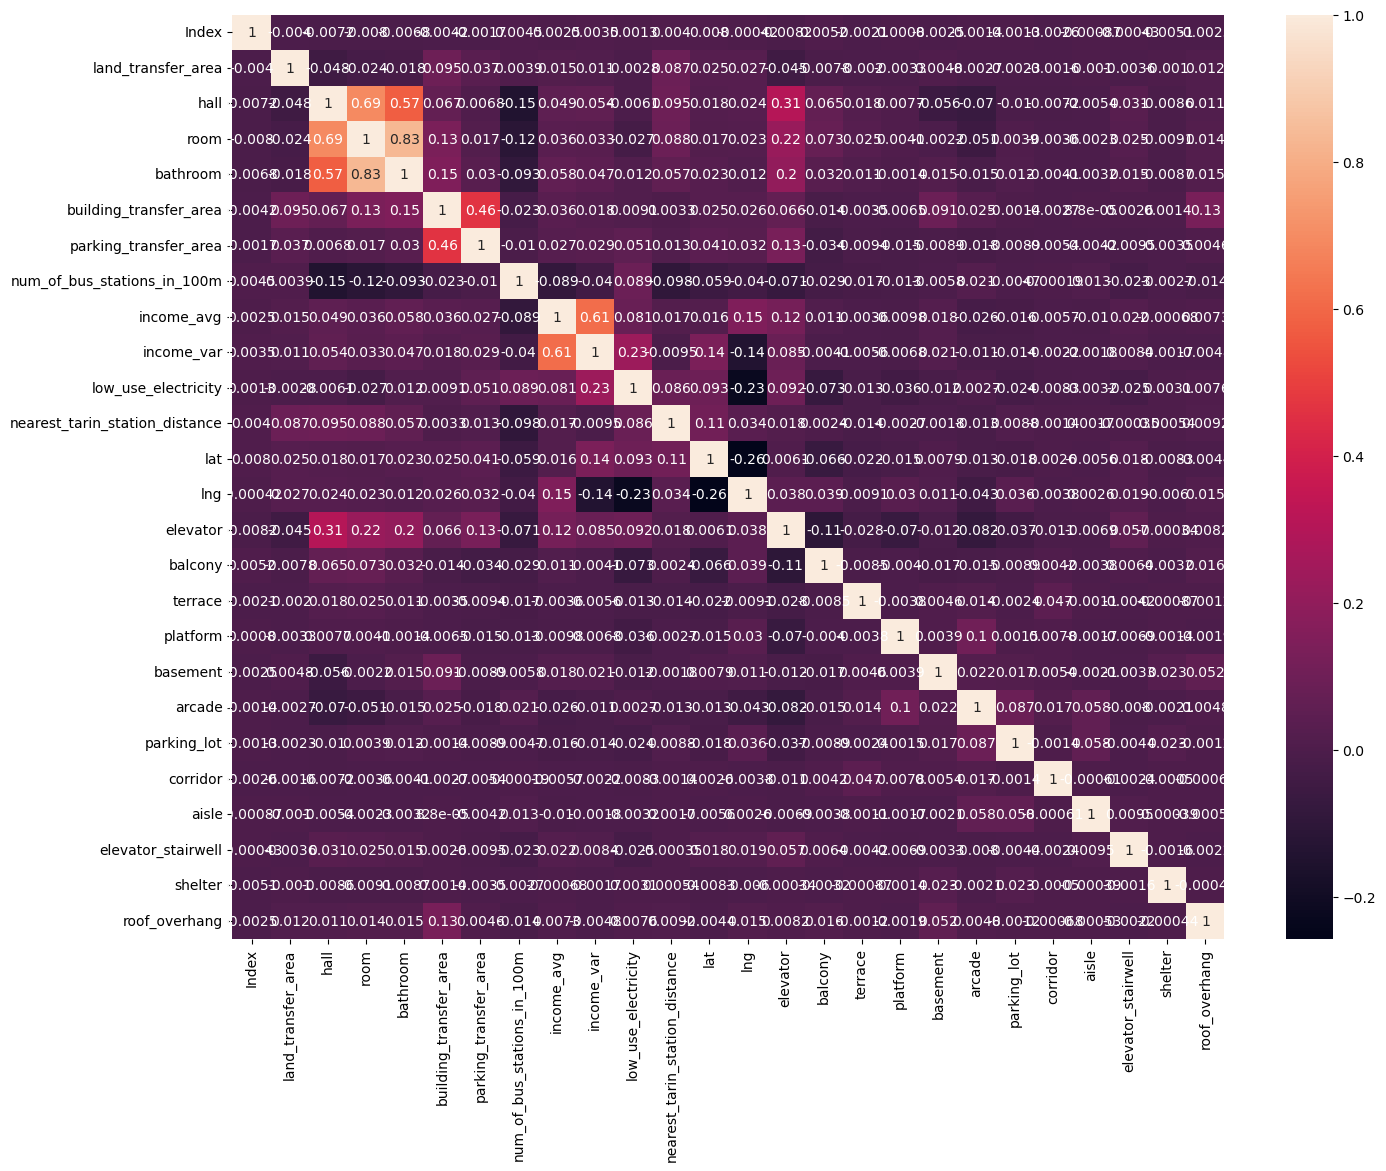

In [60]:
# Using Heatmap to visualize the Correlation.
top_corr_fea = cor.index
plt.figure(figsize=(16,12))
sns.heatmap(df[top_corr_fea].corr(), annot=True)
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46482 entries, 0 to 46481
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index                           46482 non-null  int64  
 1   main_purpose                    40381 non-null  object 
 2   transaction_target              46482 non-null  object 
 3   land_transfer_area              46482 non-null  float64
 4   building_type                   46482 non-null  object 
 5   hall                            46482 non-null  int64  
 6   room                            46482 non-null  int64  
 7   bathroom                        46482 non-null  int64  
 8   compartment                     46482 non-null  object 
 9   building_transfer_area          46482 non-null  float64
 10  management_organization         46482 non-null  object 
 11  total_floors                    41695 non-null  object 
 12  parking_transfer_area           

In [62]:
df.describe()

,Index,land_transfer_area,hall,room,bathroom,building_transfer_area,parking_transfer_area,num_of_bus_stations_in_100m,income_avg,income_var,...,terrace,platform,basement,arcade,parking_lot,corridor,aisle,elevator_stairwell,shelter,roof_overhang
count,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,...,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000
mean,23240.500000,58.883628,1.332344,2.113592,1.342111,135.444294,12.079936,2.232691,1297.368089,228.824338,...,0.002323,0.006088,0.009294,0.013295,0.002539,0.000774,0.000473,0.007616,0.000323,0.000602
std,13418.341943,652.986089,0.968113,1.944809,1.392133,502.983105,61.945046,1.574812,494.412807,245.272045,...,0.048147,0.077791,0.095957,0.114538,0.050321,0.027819,0.021751,0.086937,0.017961,0.024536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,682.000000,81.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11620.250000,11.600000,1.000000,1.000000,1.000000,53.322500,0.000000,1.000000,1005.000000,115.380000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23240.500000,23.940000,2.000000,2.000000,1.000000,98.620000,0.000000,2.000000,1141.000000,150.980000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34860.750000,37.000000,2.000000,3.000000,2.000000,155.197500,0.000000,3.000000,1438.000000,242.660000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46481.000000,102554.980000,80.000000,168.000000,174.000000,69125.530000,5073.920000,10.000000,6598.000000,2403.410000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


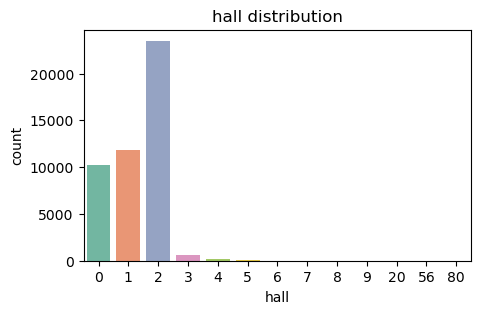

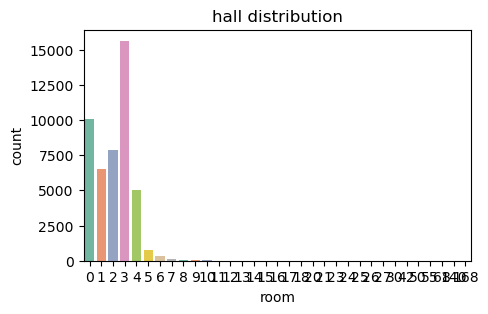

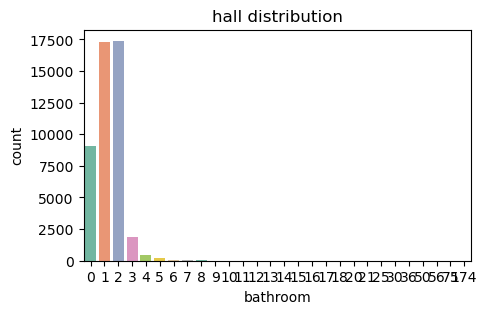

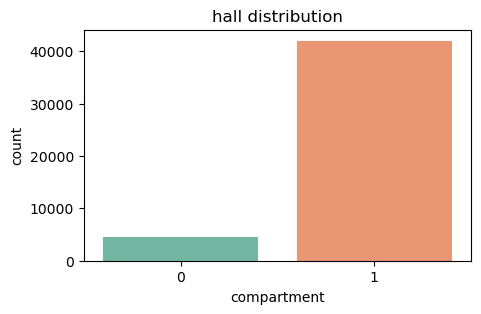

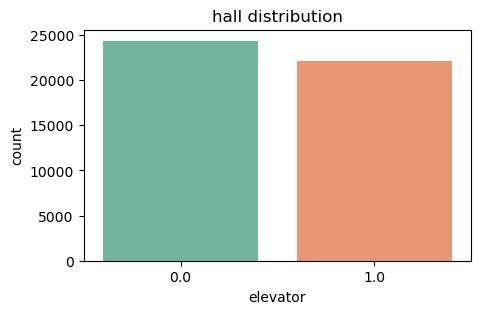

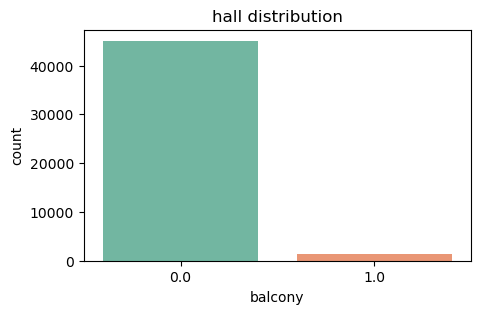

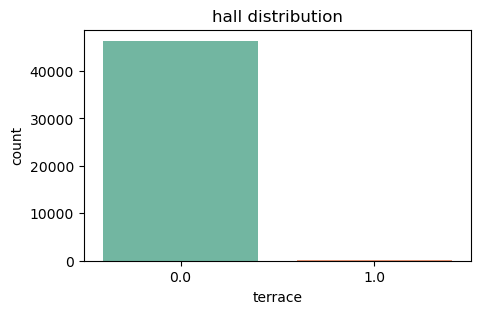

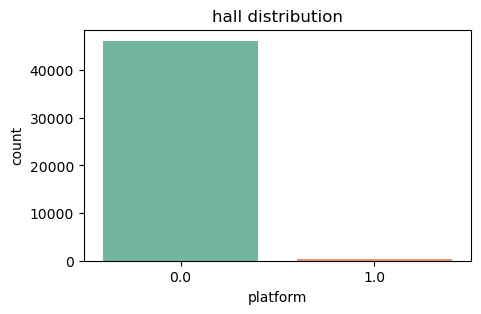

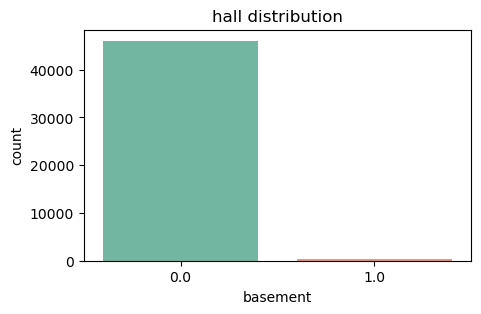

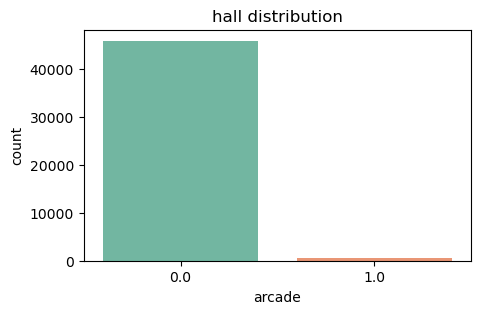

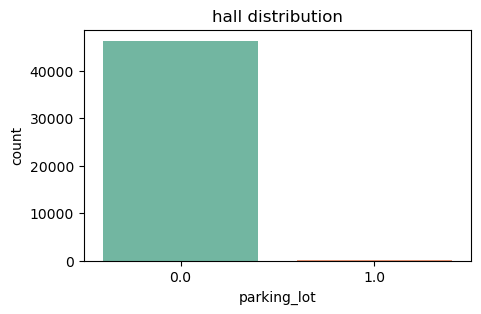

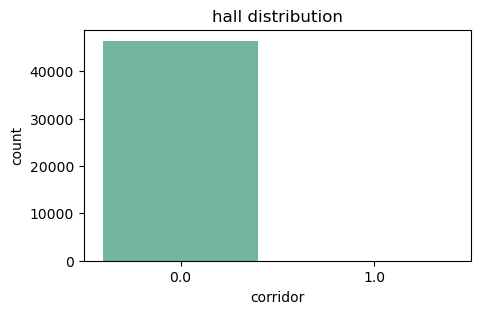

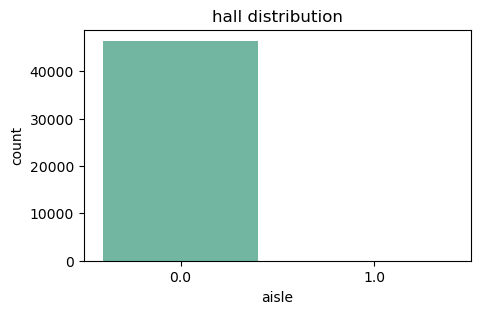

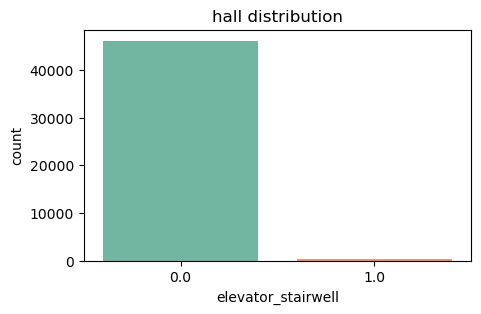

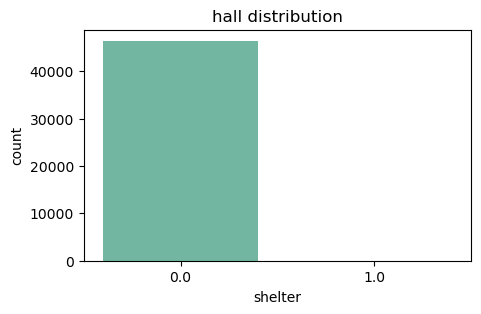

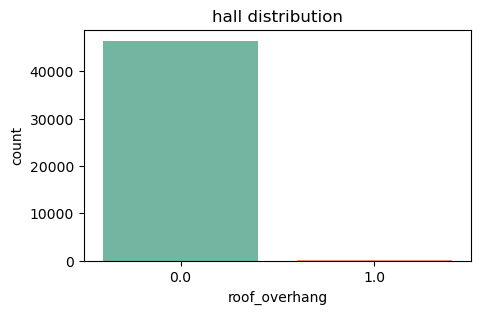

In [36]:
from pylab import mpl
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="hall", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="room", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="bathroom", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="compartment", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="elevator", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="balcony", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="terrace", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="platform", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="basement", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="arcade", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="parking_lot", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="corridor", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="aisle", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="elevator_stairwell", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="shelter", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

plt.subplots(figsize=(5,3))  # 設置長寬尺寸大小
ax = sns.countplot(x="roof_overhang", data=df, palette="Set2")
ax.set_title('hall distribution')
plt.show()

# df.rename(columns={'主要用途': 'main_purpose',
#                    '主要建材': 'main_materials',
#                    '交易標的': 'transaction_target',
#                    '土地移轉總面積(平方公尺)': 'land_transfer_area',
#                    '建物型態': 'building_type',
#                    '建物現況格局-廳': 'hall',
#                    '建物現況格局-房': 'room',
#                    '建物現況格局-衛': 'bathroom',
#                    '建物現況格局-隔間': 'compartment',
#                    '建物移轉總面積(平方公尺)': 'building_transfer_area',
#                    '有無管理組織': 'management_organization',
#                    '移轉層次': 'transfer_level',
#                    '總樓層數': 'total_floors',
#                    '車位移轉總面積(平方公尺)': 'parking_transfer_area',
#                    '車位類別': 'parking_space_type',
#                    '都市土地使用分區': 'urban_land_usage_zone',
#                    '鄉鎮市區': 'township'}, inplace=True)

<AxesSubplot:xlabel='land_transfer_area', ylabel='price_per_ping'>

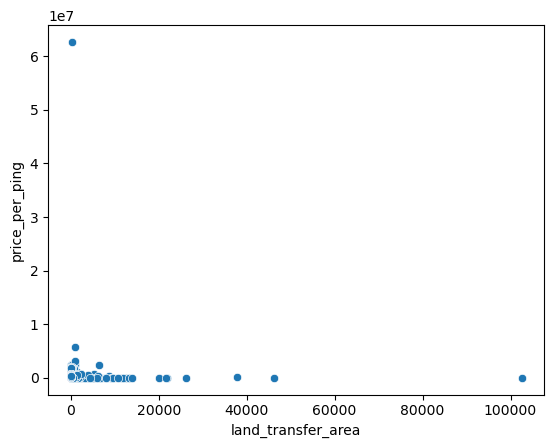

In [34]:
sns.scatterplot(data=x_train_and_label, x="land_transfer_area", y="price_per_ping")

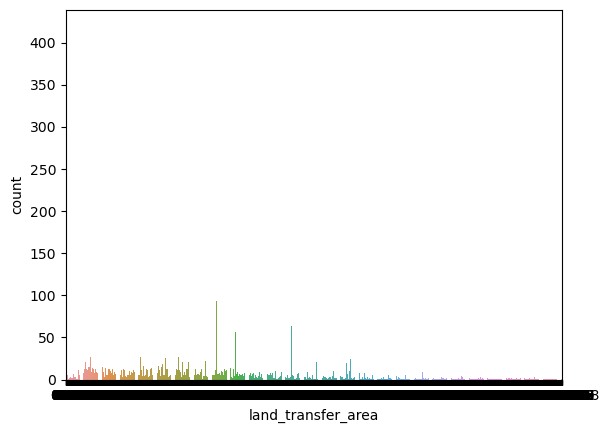

In [26]:
sns.countplot(data=df, x="land_transfer_area") #占全部的比例
plt.show()

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Selena Huang\anaconda3\lib\site-packages\seaborn\distributions.py:316: 

KeyboardInterrupt: 

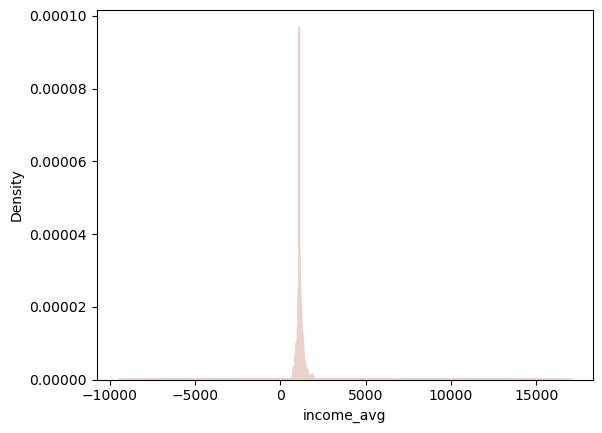

In [31]:
sns.kdeplot(data=x_train_and_label,x='income_avg',hue='price_per_ping')
plt.show()

In [16]:
# import matplotlib.font_manager
 
# a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
# for i in a:
#     print(i)

Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Bahnschrift
Baskerville Old Face
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Californian FB
Californian FB
Californian FB
Calisto MT
Calisto MT
Calisto MT
Calisto MT
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Candara
Candara
Castellar
Centaur
Century
Century Gothic
Century Gothic
Century Gothic
Century Gothic
Century Schoolbook
Century Schoolbook
Century Schoolbook
Century Schoolbook
Chiller
Colonna MT
Comic Sans MS
Comic Sans MS
Comic

In [12]:
# import matplotlib
# matplotlib.matplotlib_fname()

'C:\\Users\\Selena Huang\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [13]:
# df['車位類別'].notna()

In [382]:
# count = pd.DataFrame(df['nearest_tarin_station'].value_counts())
# # count.to_csv('test')
# count

In [327]:
# # plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# # plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# # sns.set(font=['sans-serif'])
# # sns.countplot(df['主要用途'])

# x = count.index
# y = count['主要建材']
# plt.bar(x,y,width=0.5)  # 改成 barh
# plt.show()

In [63]:
x_train = pd.get_dummies(df)
x_train

C:\Users\Selena Huang\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Index,land_transfer_area,hall,room,bathroom,building_transfer_area,parking_transfer_area,num_of_bus_stations_in_100m,income_avg,income_var,...,township_士林區,township_大同區,township_大安區,township_文山區,township_松山區,township_萬華區,location_type_APPROXIMATE,location_type_GEOMETRIC_CENTER,location_type_RANGE_INTERPOLATED,location_type_ROOFTOP
0,0,42.47,2,4,2,160.83,0.00,1.0,1842.0,230.73,...,0,0,1,0,0,0,0,0,0,1
1,1,10.18,0,1,1,31.30,0.00,3.0,4487.0,2403.41,...,0,0,0,0,0,0,0,0,1,0
2,2,33.26,2,3,2,215.38,43.24,3.0,1253.0,125.20,...,0,0,0,1,0,0,0,0,1,0
3,3,20.15,2,3,2,85.88,0.00,0.0,987.0,161.51,...,0,0,0,0,0,0,0,0,0,1
4,4,273.76,0,0,0,0.00,0.00,4.0,1105.0,107.00,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,46477,20.31,2,4,2,232.65,27.84,3.0,1019.0,202.65,...,0,1,0,0,0,0,0,0,0,1
46478,46478,23.88,2,2,1,66.09,0.00,3.0,1276.0,126.51,...,0,0,0,0,0,0,0,0,0,1
46479,46479,8.03,1,1,1,52.59,0.00,2.0,851.0,97.00,...,1,0,0,0,0,0,0,0,1,0
46480,46480,27.74,2,2,2,158.85,35.68,0.0,1458.0,160.46,...,0,0,0,0,0,0,0,0,1,0


In [49]:
# dummies = pd.get_dummies(df[['主要建材','主要用途']])
x_train = pd.get_dummies(df)
# x_train.isnull().any().to_csv('isnull')
x_train.to_csv('x_train.csv',encoding='big5')
x_train

C:\Users\Selena Huang\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Index,land_transfer_area,hall,room,bathroom,building_transfer_area,parking_transfer_area,num_of_bus_stations_in_100m,income_avg,income_var,...,township_士林區,township_大同區,township_大安區,township_文山區,township_松山區,township_萬華區,location_type_APPROXIMATE,location_type_GEOMETRIC_CENTER,location_type_RANGE_INTERPOLATED,location_type_ROOFTOP
0,0,42.47,2,4,2,160.83,0.00,1.0,1842.0,230.73,...,0,0,1,0,0,0,0,0,0,1
1,1,10.18,0,1,1,31.30,0.00,3.0,4487.0,2403.41,...,0,0,0,0,0,0,0,0,1,0
2,2,33.26,2,3,2,215.38,43.24,3.0,1253.0,125.20,...,0,0,0,1,0,0,0,0,1,0
3,3,20.15,2,3,2,85.88,0.00,0.0,987.0,161.51,...,0,0,0,0,0,0,0,0,0,1
4,4,273.76,0,0,0,0.00,0.00,4.0,1105.0,107.00,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,46477,20.31,2,4,2,232.65,27.84,3.0,1019.0,202.65,...,0,1,0,0,0,0,0,0,0,1
46478,46478,23.88,2,2,1,66.09,0.00,3.0,1276.0,126.51,...,0,0,0,0,0,0,0,0,0,1
46479,46479,8.03,1,1,1,52.59,0.00,2.0,851.0,97.00,...,1,0,0,0,0,0,0,0,1,0
46480,46480,27.74,2,2,2,158.85,35.68,0.0,1458.0,160.46,...,0,0,0,0,0,0,0,0,1,0


In [93]:
x_train = x_train[['Index','building_transfer_area','room','land_transfer_area','income_avg','lng','lat','parking_transfer_area','nearest_tarin_station_distance','income_var']]
# x_train = x_train[['Index','building_transfer_area','room','land_transfer_area','income_avg','lng','lat']]
# x_train = x_train.loc[:,:'lng']
x_train

,Index,building_transfer_area,room,land_transfer_area,income_avg,lng,lat,parking_transfer_area,nearest_tarin_station_distance,income_var
0,0,160.83,4,42.47,1842.0,121.553310,25.040024,0.00,243.720563,230.73
1,1,31.30,1,10.18,4487.0,121.521534,25.038312,0.00,460.755880,2403.41
2,2,215.38,3,33.26,1253.0,121.563008,24.981564,43.24,2041.004785,125.20
3,3,85.88,3,20.15,987.0,121.568545,25.084378,0.00,283.496196,161.51
4,4,0.00,0,273.76,1105.0,121.565418,25.032969,0.00,225.107002,107.00
...,...,...,...,...,...,...,...,...,...,...
46477,46477,232.65,4,20.31,1019.0,121.513942,25.066120,27.84,341.679757,202.65
46478,46478,66.09,2,23.88,1276.0,121.576939,25.040145,0.00,71.990784,126.51
46479,46479,52.59,1,8.03,851.0,121.519788,25.082793,0.00,580.837941,97.00
46480,46480,158.85,2,27.74,1458.0,121.589117,25.083569,35.68,665.482925,160.46


In [64]:
x_label = pd.read_csv("train_label.csv",encoding='big5')
x_label

,Index,price_per_ping
0,0,290990
1,1,255591
2,2,132330
3,3,145319
4,4,36528
...,...,...
46477,46477,210961
46478,46478,229989
46479,46479,266210
46480,46480,177526


In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46482 entries, 0 to 46481
Columns: 117 entries, Index to location_type_ROOFTOP
dtypes: float64(22), int64(4), uint8(91)
memory usage: 13.3 MB


In [51]:
x_train.describe()

,Index,land_transfer_area,hall,room,bathroom,building_transfer_area,parking_transfer_area,num_of_bus_stations_in_100m,income_avg,income_var,...,township_士林區,township_大同區,township_大安區,township_文山區,township_松山區,township_萬華區,location_type_APPROXIMATE,location_type_GEOMETRIC_CENTER,location_type_RANGE_INTERPOLATED,location_type_ROOFTOP
count,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,...,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000,46482.000000
mean,23240.500000,58.883628,1.332344,2.113592,1.342111,135.444294,12.079936,2.232691,1297.368089,228.824338,...,0.086829,0.042963,0.090960,0.101867,0.062411,0.075363,0.070371,0.020395,0.221441,0.687707
std,13418.341943,652.986089,0.968113,1.944809,1.392133,502.983105,61.945046,1.574812,494.412807,245.272045,...,0.281588,0.202776,0.287555,0.302477,0.241904,0.263978,0.255775,0.141349,0.415221,0.463434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,682.000000,81.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11620.250000,11.600000,1.000000,1.000000,1.000000,53.322500,0.000000,1.000000,1005.000000,115.380000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23240.500000,23.940000,2.000000,2.000000,1.000000,98.620000,0.000000,2.000000,1141.000000,150.980000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,34860.750000,37.000000,2.000000,3.000000,2.000000,155.197500,0.000000,3.000000,1438.000000,242.660000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,46481.000000,102554.980000,80.000000,168.000000,174.000000,69125.530000,5073.920000,10.000000,6598.000000,2403.410000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [607]:
# # Using Heatmap to visualize the Correlation.
# cor2 = x_train.corr()
# top_corr_fea = cor2.index
# plt.figure(figsize=(16,12))
# sns.heatmap(df[top_corr_fea].corr(), annot=True)
# plt.show()
# cor2

In [383]:
x_test = pd.get_dummies(df)
# x_test.isnull().any().to_csv('isnull2')
x_test.to_csv('x_test.csv',encoding='big5')

C:\Users\Selena Huang\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [384]:
x_test = x_test.drop(columns=['Index'])
# x_test = x_test.loc[:,:'lng']
x_test

,land_transfer_area,hall,room,bathroom,building_transfer_area,parking_transfer_area,num_of_bus_stations_in_100m,income_avg,income_var,low_use_electricity,...,township_士林區,township_大同區,township_大安區,township_文山區,township_松山區,township_萬華區,location_type_APPROXIMATE,location_type_GEOMETRIC_CENTER,location_type_RANGE_INTERPOLATED,location_type_ROOFTOP
0,15.00,1,2,1,52.80,0.00,0,2047.000000,658.500000,5.130000,...,0,0,1,0,0,0,0,0,0,1
1,1143.00,0,0,0,0.00,0.00,4,1105.000000,107.000000,4.560000,...,0,0,0,0,0,0,1,0,0,0
2,18.43,2,3,2,176.84,45.09,2,1180.000000,178.630000,5.020000,...,0,0,0,0,0,0,0,0,0,1
3,77.46,0,0,0,575.01,127.83,0,1165.000000,175.630000,3.590000,...,0,0,0,0,0,0,0,0,1,0
4,26.50,1,2,1,67.84,0.00,1,1125.000000,192.080000,6.640000,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,34.77,1,1,2,227.98,69.68,1,1325.000000,166.990000,10.870000,...,0,0,0,0,0,0,0,0,1,0
19917,54.54,2,3,2,330.30,55.14,0,1423.000000,174.000000,16.590000,...,0,0,0,0,0,0,0,0,1,0
19918,0.32,0,0,0,0.00,0.00,4,1105.000000,107.000000,4.560000,...,0,0,0,0,0,0,1,0,0,0
19919,15.55,0,0,0,0.00,0.00,0,1299.549851,233.427797,7.825002,...,1,0,0,0,0,0,0,1,0,0


In [219]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# def rfclassifier(X_train,y_train,X_test):
        
#     X_train = X_train
#     y_train = y_train
#     X_test = X_test
    
#     rmf = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth=10)
#     rmf.fit(X_train, y_train) 
#     y_pred = rmf.predict(X_test)
    
#     print(confusion_matrix(y_test,y_pred))
#     print(classification_report(y_test,y_pred))
#     print(accuracy_score(y_test, y_pred))

# x = x_train
# y = x_label['price_per_ping']
# z = x_test
# rfclassifier(x,y,z)

In [94]:
x_train_and_label = x_train.merge(x_label)
x = x_train_and_label.drop(columns=['Index','price_per_ping'])
y = x_train_and_label['price_per_ping']

In [95]:
xxx_train, xxx_test, yyy_train, yyy_test = train_test_split(x, y, test_size=0.25, random_state=0)
xxx_train

,building_transfer_area,room,land_transfer_area,income_avg,lng,lat,parking_transfer_area,nearest_tarin_station_distance,income_var
29967,38.06,0,5.07,1012.0,121.510126,25.111555,0.00,639.116432,110.37
19839,64.24,2,4.35,1261.0,121.502070,25.039796,0.00,550.927268,713.93
28274,66.85,2,22.75,1125.0,121.554982,25.032043,0.00,250.409368,192.08
10862,141.14,4,32.67,1564.0,121.526479,25.118595,0.00,1189.426038,201.95
37519,0.00,0,87.67,1105.0,121.565418,25.032969,0.00,225.107002,107.00
...,...,...,...,...,...,...,...,...,...
21243,145.97,3,26.95,2049.0,121.524633,25.123139,12.40,1324.274158,261.04
45891,130.97,2,43.19,1849.0,121.585062,24.986534,33.09,1422.358454,137.31
42613,27.37,3,17.00,937.0,121.499950,25.025141,0.00,1127.705729,134.42
43567,45.81,1,3.76,1287.0,121.558231,25.051733,0.00,225.287538,150.76


In [96]:
from sklearn.linear_model import LinearRegression
lnregr = LinearRegression()
lnregr.fit(xxx_train, yyy_train)
yyy_pred = lnregr.predict(xxx_test).astype('int')

# print(confusion_matrix(yyy_test,yyy_pred))
# print(classification_report(yyy_test,yyy_pred))
# print(accuracy_score(yyy_test, yyy_pred))

import sklearn.metrics as sm
# print("Mean absolute error =", round(sm.mean_absolute_error(yyy_test, yyy_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(yyy_test, yyy_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(yyy_test, yyy_pred), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 14407027670.07
Root mean square error = 120029.28
R2 score = 0.07


In [68]:
lnregr.coef_
lnregr.intercept_

-68787666.84959862

In [69]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
x_poly = poly_reg.fit_transform(xxx_train)
lnregr_2 = LinearRegression()
lnregr_2.fit(x_poly, yyy_train)

LinearRegression()

In [70]:
lnregr_2.coef_
lnregr_2.intercept_

-68787666.84962068

In [71]:
# from sklearn.linear_model import LogisticRegression
# loregr = LogisticRegression()
# loregr.fit(xxx_train, yyy_train)
# yyy_pred = loregr.predict(xxx_test).astype('int')
# print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
# print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
# print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

In [97]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(xxx_train, yyy_train)
yyy_pred = lasso.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 14406909432.51
Root mean square error = 120028.79
R2 score = 0.07


In [73]:
lasso.coef_
lasso.intercept_

-68861539.11557226

In [98]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=0.5)
rid.fit(xxx_train, yyy_train)
yyy_pred = rid.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 14406230162.68
Root mean square error = 120025.96
R2 score = 0.07


In [99]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(xxx_train, yyy_train)
yyy_pred = br.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 14574441233.08
Root mean square error = 120724.65
R2 score = 0.05


In [76]:
# from sklearn.linear_model import QuantileRegressor
# qr = QuantileRegressor()
# qr.fit(xxx_train, yyy_train)
# yyy_pred = qr.predict(xxx_test).astype('int')
# print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
# print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
# print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

In [100]:
# 會跑很久
from sklearn import svm
svm = svm.SVR()
svm.fit(xxx_train, yyy_train)
yyy_pred = svm.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 15631473015.86
Root mean square error = 125025.89
R2 score = -0.01


In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(xxx_train, yyy_train)
yyy_pred = knn.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 12794319557.81
Root mean square error = 113111.98
R2 score = 0.17


In [102]:
# 會跑很久
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=3000,hidden_layer_sizes=40,solver='lbfgs')
mlp.fit(xxx_train, yyy_train)
yyy_pred = mlp.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 16240542344.58
Root mean square error = 127438.39
R2 score = -0.05


In [103]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=7, random_state=0)
clf.fit(xxx_train, yyy_train)
yyy_pred = clf.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 12780760616.59
Root mean square error = 113052.03
R2 score = 0.17


In [104]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
xgb.fit(xxx_train, yyy_train)
yyy_pred = xgb.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 13925258230.35
Root mean square error = 118005.33
R2 score = 0.1


In [105]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=20, learning_rate=0.01, random_state=0,loss='square')
ada.fit(xxx_train, yyy_train)
yyy_pred = ada.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 14117819167.87
Root mean square error = 118818.43
R2 score = 0.08


In [108]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=320, learning_rate=0.17, max_depth=6,
                                random_state=0, validation_fraction=0.3,min_samples_split=3,
                                min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 13805245293.28
Root mean square error = 117495.72
R2 score = 0.1


In [83]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=320, learning_rate=0.17, max_depth=7,
                                random_state=0, validation_fraction=0.3,min_samples_split=3,
                                min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7625339972.59
Root mean square error = 87323.19
R2 score = 0.51


In [505]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=500, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7768408213.98
Root mean square error = 88138.57
R2 score = 0.5


In [511]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=450, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7730020979.04
Root mean square error = 87920.54
R2 score = 0.5


In [497]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=400, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7705447710.24
Root mean square error = 87780.68
R2 score = 0.5


In [523]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=350, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7668616280.29
Root mean square error = 87570.64
R2 score = 0.5


In [517]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=330, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7638123915.62
Root mean square error = 87396.36
R2 score = 0.5


In [535]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=320, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7625339972.59
Root mean square error = 87323.19
R2 score = 0.51


In [512]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=300, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7669625699.76
Root mean square error = 87576.4
R2 score = 0.5


In [516]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=250, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7714921971.04
Root mean square error = 87834.63
R2 score = 0.5


In [513]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7705420349.27
Root mean square error = 87780.52
R2 score = 0.5


In [514]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=190, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=3, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7709007792.71
Root mean square error = 87800.96
R2 score = 0.5


In [498]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=400, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=2, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7727787177.2
Root mean square error = 87907.83
R2 score = 0.5


In [499]:
from sklearn.ensemble import GradientBoostingRegressor #1521XXX
est = GradientBoostingRegressor(n_estimators=190, learning_rate=0.17, max_depth=7, random_state=0, validation_fraction=0.4,min_samples_split=2, min_samples_leaf=1,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7570760627.64
Root mean square error = 87010.12
R2 score = 0.51


In [397]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=190, learning_rate=0.17, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7570760627.64
Root mean square error = 87010.12
R2 score = 0.51


In [372]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.17, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7605182339.25
Root mean square error = 87207.7
R2 score = 0.51


In [187]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=400, learning_rate=0.3, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 8535032809.94
Root mean square error = 92385.24
R2 score = 0.45


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=500, learning_rate=0.25, max_depth=5, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7755732894.15
Root mean square error = 88066.64
R2 score = 0.5


In [159]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=30, learning_rate=0.4, max_depth=5, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 8875426925.2
Root mean square error = 94209.48
R2 score = 0.42


In [208]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.16, max_depth=3, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 9165456289.74
Root mean square error = 95736.39
R2 score = 0.41


In [223]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.17, max_depth=3, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 8797889331.45
Root mean square error = 93797.06
R2 score = 0.43


In [219]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 9001063384.19
Root mean square error = 94873.93
R2 score = 0.42


In [204]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.17, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7697391333.34
Root mean square error = 87734.78
R2 score = 0.5


In [230]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=110, learning_rate=0.17, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7638872279.53
Root mean square error = 87400.64
R2 score = 0.5


In [395]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.2, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7636491462.42
Root mean square error = 87387.02
R2 score = 0.5


In [391]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100, iterated_power=1)
# train_reduced = pca.fit_transform(xxx_train)
# train_reduced

array([[-7.57621711e+01, -1.61471614e+02,  2.64772622e+02, ...,
         1.01658838e-01, -7.43752841e-03, -7.13729653e-02],
       [-7.06319059e+01, -2.78234997e+01, -1.20184826e+02, ...,
        -6.38343509e-02,  5.37057481e-02, -1.11239653e-02],
       [-9.37600442e+01, -7.87625679e+01,  2.35913200e+02, ...,
        -2.86179258e-02,  1.67988289e-02,  2.26259988e-02],
       ...,
       [-1.29136929e+01, -2.21181288e+02,  2.07788235e+02, ...,
        -7.06941257e-02, -2.05854441e-02,  2.80218239e-03],
       [-1.14574512e+02, -6.09467170e+01,  1.05044039e+02, ...,
         7.59773288e-02, -5.77379328e-02,  6.42369055e-02],
       [-6.92562165e+01, -5.92938873e+01,  1.97818986e+02, ...,
        -5.14338994e-03,  2.50777557e-02,  6.01342146e-02]])

In [629]:
import shap
explainer = shap.Explainer(est)
shap_values = explainer(xxx_train)

Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
Glyph 37610 (\N{CJK UNIFIED IDEOGRAPH-92EA}) missing from current font.
Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from current font.
Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
Glyph 23652 (\N{CJK UNIFIED IDEOGRAPH-5C64}) missing from current font.
Glyph 20854 (\N{CJK UNIFIED IDEOGRAPH-5176}) missing from current font.
Glyph 20182 (\N{CJK UNIFIED IDEOGRAPH-4ED6}) missing from current font.
Glyph 20303 (\N{CJK UNIFIED IDEOGRAPH-4F4F}) missing from current font.
Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
Glyph 36879 (\N{CJK UNIFIED IDEOGRAPH-900F}) missing from current font.
Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from curren

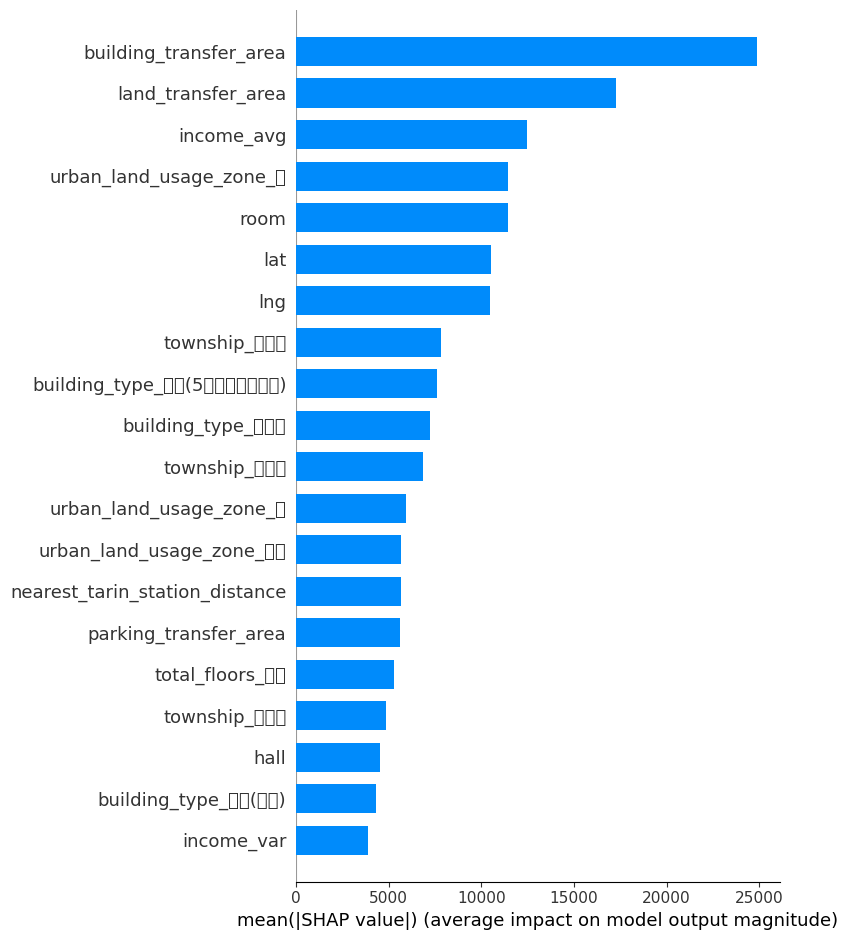

In [630]:
shap.summary_plot(shap_values, xxx_train, plot_type="bar")

In [ ]:
# shap_interaction_values = explainer.shap_interaction_values(xxx_train)
# shap.summary_plot(shap_interaction_values, xxx_train)

In [47]:
# # waterfall
# shap.plots.waterfall(shap_values[10])

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import random
from keras import regularizers
from keras.layers import Dense,Dropout,BatchNormalization
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import  mean_squared_error

np.random.seed(1) # 固定隨機種子，使每次運行结果固定
random.set_seed(1)


# 創建模型結構：輸入層的特徵維數為116；1層k個神經元的relu隱藏層；線性的輸出層

for k in [5,20,50]:  # 網格搜索超參數：神經元數k
    
    model = Sequential()

    model.add(BatchNormalization(input_dim=9)) # 輸入層 批標準化

    model.add(Dense(k,  
                    kernel_initializer='random_uniform',   # 均匀初始化
                    activation='relu',                     # relu激活函數
                    kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),  # L1及L2 正則項
                    use_bias=True))   # 隱藏層

    model.add(Dropout(0.1)) # dropout法
    
    model.add(Dense(k,  
                    kernel_initializer='random_uniform',   # 均匀初始化
                    activation='relu',                     # relu激活函數
                    kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01),  # L1及L2 正則項
                    use_bias=True))   # 隱藏層
    
    model.add(Dropout(0.1)) # dropout法

    model.add(Dense(1,use_bias=True))  # 輸出層

In [113]:
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
140/140 [==============================] - 1s 3ms/step - loss: 194658254848.0000 - val_loss: 50811355136.0000
Epoch 2/100
140/140 [==============================] - 0s 2ms/step - loss: 194506309632.0000 - val_loss: 48473018368.0000
Epoch 3/100
140/140 [==============================] - 0s 2ms/step - loss: 193251606528.0000 - val_loss: 42822602752.0000
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 188658712576.0000 - val_loss: 35521253376.0000
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 179666305024.0000 - val_loss: 27984310272.0000
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: 169158770688.0000 - val_loss: 20688742400.0000
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 161884602368.0000 - val_loss: 17046161408.0000
Epoch 8/100
140/140 [==============================] - 0s 2ms/step - loss: 159309627392.0000 - val_loss: 16142652416.0000
Epoch 9/100
140/140 [===

 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,137
Trainable params: 3,119
Non-trainable params: 18
_________________________________________________________________


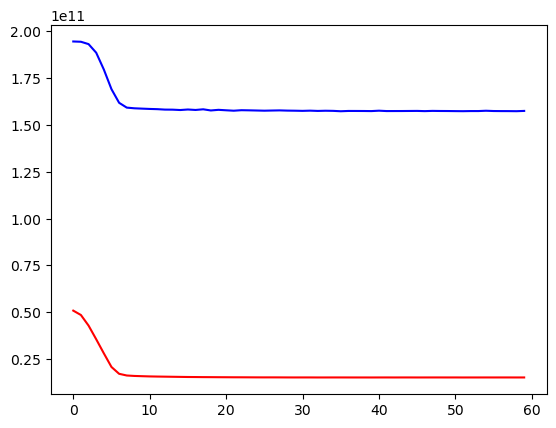

In [114]:
history = model.fit(xxx_train, 
                    yyy_train, 
                    epochs=100,              # 訓練迭代次數
                    batch_size=200,           # 每epoch採樣的batch大小
                    validation_split=0.2,   # 從訓練集再拆分驗證集，作為早停的衡量指標
                    callbacks=[EarlyStopping(monitor='val_loss', patience=20)],    #早停法
                    verbose=True)  # 不輸出過程


print("驗證集最優结果：",min(history.history['val_loss']))
model.summary()
plt.plot(history.history['loss'],c='blue')    # 藍色線訓練集損失
plt.plot(history.history['val_loss'],c='red') # 紅色線驗證集損失
plt.show()

364/364 [==============================] - 0s 744us/step
真實標籤： 24648    141823
35745    208932
15066    166440
23138    220377
42628    162302
          ...  
15152    132362
900       65250
28815    174150
36122    179487
15872    271928
Name: price_per_ping, Length: 11621, dtype: int64
模型預測： [210914.48 181277.88 181024.05 ... 179841.56 253834.6  175089.61]
實際與預測值的差異(rmse)： 119999.27108462522


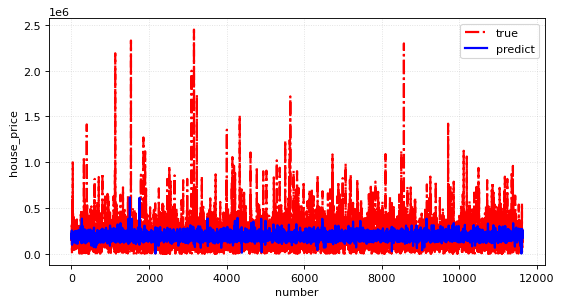

In [115]:
pred_y = model.predict(xxx_test)[:,0]

print("真實標籤：",yyy_test)
print("模型預測：",pred_y)

print("實際與預測值的差異(rmse)：", np.sqrt(mean_squared_error(yyy_test,pred_y)))

import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(yyy_test)), yyy_test, ls='-.',lw=2,c='r',label='true')
plt.plot(range(len(pred_y)), pred_y, ls='-',lw=2,c='b',label='predict')

plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number')
plt.ylabel('house_price')
plt.show()

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers.core import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Embedding



# 建立模型
modelCNN = Sequential()
modelCNN.add(Embedding(output_dim=32, input_dim=120000, input_length=117))
# 隨機在神經網路中放棄20%的神經元，避免overfitting
dropout_percent = 0.5
modelCNN.add(Dropout(dropout_percent))

# 建立卷積層1(Convolution1)
modelCNN.add(Conv1D(filters=64,padding='same', activation='relu', kernel_size=3))
modelCNN .add(Dropout(dropout_percent))

# 建立池化層1(Pooling1)
modelCNN.add(MaxPooling1D(pool_size=2))


# 建立卷積層2(Convolution2)
modelCNN.add(Conv1D(filters=128,padding='valid', activation='relu', kernel_size=4))
modelCNN .add(Dropout(dropout_percent))

# 建立池化層2(Pooling2)
modelCNN.add(MaxPooling1D(pool_size=3))


# 建立平坦層
modelCNN.add(Flatten())
modelCNN.add(Dropout(dropout_percent))

# 建立隱藏層 (250個神經元)
modelCNN.add(Dense(250, activation='relu'))
modelCNN.add(Dropout(dropout_percent))

# 建立輸出層 (1個神經元)
modelCNN.add(Dense(1, activation='sigmoid'))

# 查看模型摘要
modelCNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 117, 32)           3840000   
                                                                 
 dropout_30 (Dropout)        (None, 117, 32)           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 117, 64)           6208      
                                                                 
 dropout_31 (Dropout)        (None, 117, 64)           0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 58, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 55, 128)           32896     
                                                      

In [28]:
import matplotlib.pyplot as plt

def show_train_history(train, val,y_label,title):
    plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(y_label)
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [49]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + 
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 定義訓練模型
modelCNN.compile(optimizer='adam', loss='mse', metrics=["accuracy",f1_m,precision_m, recall_m])



# 模型訓練
train_history = modelCNN.fit(xxx_train,yyy_train,
         epochs=20, 
         batch_size=128,
         verbose=1,
         validation_split=0.1)

# 準確率
# loss, accuracy, f1_score, precision, recall = modelCNN.evaluate(xxx_test,yyy_test, verbose=1)
# 畫出accuracy圖
# show_train_history('accuracy', 'val_accuracy', "Accuracy", "CNN Accuracy History")
# show_train_history('loss', 'val_loss', "Loss", "CNN Loss History")

Epoch 1/20
106/106 [==============================] - 7s 64ms/step - loss: 51906129920.0000 - accuracy: 0.0000e+00 - f1_m: 0.9951 - precision_m: 0.9902 - recall_m: 1.0000 - val_loss: 54972514304.0000 - val_accuracy: 0.0000e+00 - val_f1_m: 0.9952 - val_precision_m: 0.9906 - val_recall_m: 1.0000
Epoch 2/20
106/106 [==============================] - 7s 62ms/step - loss: 51906150400.0000 - accuracy: 0.0000e+00 - f1_m: 0.9951 - precision_m: 0.9902 - recall_m: 1.0000 - val_loss: 54972514304.0000 - val_accuracy: 0.0000e+00 - val_f1_m: 0.9952 - val_precision_m: 0.9906 - val_recall_m: 1.0000
Epoch 3/20
106/106 [==============================] - 7s 65ms/step - loss: 51906134016.0000 - accuracy: 0.0000e+00 - f1_m: 0.9951 - precision_m: 0.9902 - recall_m: 1.0000 - val_loss: 54972514304.0000 - val_accuracy: 0.0000e+00 - val_f1_m: 0.9952 - val_precision_m: 0.9906 - val_recall_m: 1.0000
Epoch 4/20
106/106 [==============================] - 7s 66ms/step - loss: 51906129920.0000 - accuracy: 0.0000e+00 

156/156 [==============================] - 0s 3ms/step - loss: 51757789184.0000 - accuracy: 0.0000e+00 - f1_m: 0.9967 - precision_m: 0.9936 - recall_m: 1.0000


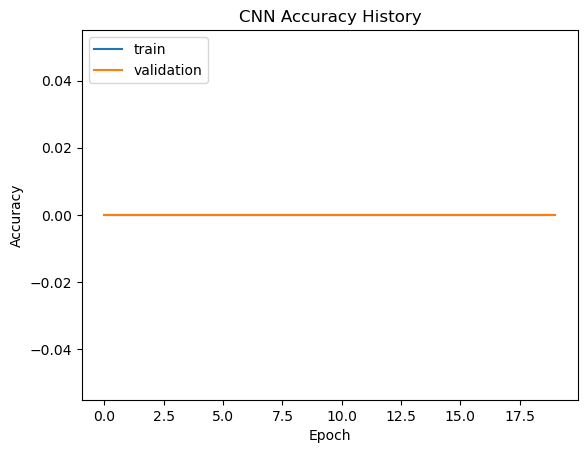

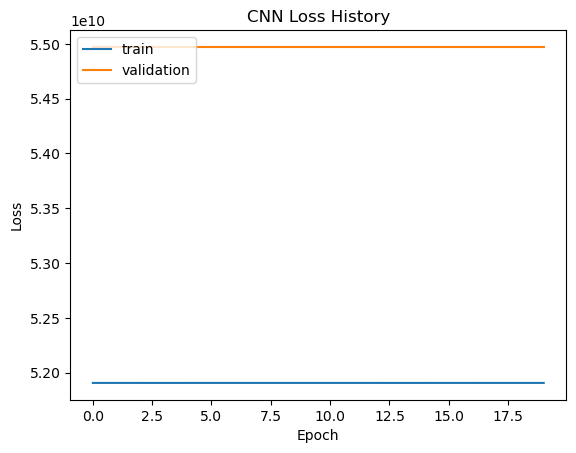

In [50]:
# 準確率
loss, accuracy, f1_score, precision, recall = modelCNN.evaluate(xxx_test,yyy_test, verbose=1)
# 畫出accuracy圖
show_train_history('accuracy', 'val_accuracy', "Accuracy", "CNN Accuracy History")
show_train_history('loss', 'val_loss', "Loss", "CNN Loss History")

In [67]:
print('CNN: ')
print()

# Accuracy,Precision,Recall,F1-score
print("Testing Accuracy :",'%.4f'%accuracy)
print("Testing Precision :", '%.4f'%precision)
print("Testing Recall :",'%.4f'%recall)
print("Testing f1-score :", '%.4f'%f1_score)
print()


CNN: 

Testing Accuracy : 0.0000
Testing Precision : 0.9936
Testing Recall : 1.0000
Testing f1-score : 0.9967



In [69]:
y_pred = modelCNN.predict(xxx_test)
y_pred

156/156 [==============================] - 0s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

### Best Result
#### 移除nearest_tarin_station 保留移轉層次

In [988]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.15, max_depth=6, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 11199646461.82
Root mean square error = 105828.38
R2 score = 0.27


In [1079]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.16, max_depth=6, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 8244414068.08
Root mean square error = 90798.76
R2 score = 0.47


In [233]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.17, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7697391333.34
Root mean square error = 87734.78
R2 score = 0.5


In [230]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(n_estimators=110, learning_rate=0.17, max_depth=7, random_state=0,loss='squared_error')
est.fit(xxx_train, yyy_train)
yyy_pred = est.predict(xxx_test).astype('int')
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7638872279.53
Root mean square error = 87400.64
R2 score = 0.5


In [399]:
yyy_pred = pd.DataFrame(yyy_pred)
yyy_pred

,0
0,302225
1,185922
2,139676
3,167231
4,136972
...,...
9292,262405
9293,206916
9294,118445
9295,179615


In [586]:
# lnregr.fit(x_train, x_label['price_per_ping'])
y_predict = est.predict(x_test) # est # model
y_predict

array([213889.06458056, 214316.15156301, 191301.83759348, ...,
        18380.89148719,  84984.22766623, 273892.68861424])

In [587]:
y_predict = pd.DataFrame(y_predict).astype('int')
y_predict.columns = ['price_per_ping']
y_predict = y_predict.reset_index()
y_predict

,index,price_per_ping
0,0,213889
1,1,214316
2,2,191301
3,3,240401
4,4,200438
...,...,...
19916,19916,167338
19917,19917,244630
19918,19918,18380
19919,19919,84984


In [588]:
y_predict.mean() #187797(1511) #187805(1514) #187760(1513) #187782(1513)

index               9960.000000
price_per_ping    187782.804829
dtype: float64

In [589]:
y_predict.loc[y_predict['price_per_ping'] < 0 ,'price_per_ping'] = 0
y_predict

,index,price_per_ping
0,0,213889
1,1,214316
2,2,191301
3,3,240401
4,4,200438
...,...,...
19916,19916,167338
19917,19917,244630
19918,19918,18380
19919,19919,84984


In [590]:
y_predict.to_csv('submission.csv',index=False)

In [576]:
yyy_pred = pd.DataFrame(yyy_pred).astype('int')
yyy_pred.columns = ['price_per_ping']

In [577]:
yyy_pred.loc[yyy_pred['price_per_ping'] < 0 ,'price_per_ping'] = 0
yyy_pred

,price_per_ping
0,241477
1,189140
2,171807
3,223661
4,144930
...,...
11616,137790
11617,108397
11618,191040
11619,198394


In [578]:
print("Mean squared error =", round(sm.mean_squared_error(yyy_test, yyy_pred), 2)) 
print("Root mean square error =", round(np.sqrt(sm.mean_squared_error(yyy_test, yyy_pred)), 2)) 
print("R2 score =", round(sm.r2_score(yyy_test, yyy_pred), 2))

Mean squared error = 7614286494.09
Root mean square error = 87259.88
R2 score = 0.51


In [749]:
yyy_pred = yyy_pred.reset_index()
yyy_pred.to_csv('ttt.csv',index=False)